In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install deepface

In [3]:
import os
import cv2, os
import numpy as np
from IPython.display import display, Image
import matplotlib.pyplot as plt
from tqdm import tqdm, auto
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
def avgerate_frame_per_seg(cap, seg=4, display_bool=False):
  # Set the frame rate and interval for frame extraction
    frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
    interval_seconds = seg
    interval_frames = frame_rate * interval_seconds

    frame_rgb_list = []
    seg_count = 0
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Extract a frame every 'interval_frames' frames
        if frame_count % interval_frames == 0:
            seg_count += 1
            frame_rgb_list.append([])

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb_list[seg_count-1].append(frame_rgb[np.newaxis, :])

        frame_count += 1


    frame_rgb_list = [np.vstack(seg_frame_list).mean(0) for seg_frame_list in frame_rgb_list]
    frame_rgb_list = [np.rint(seg_frame_list).astype('int') for seg_frame_list in frame_rgb_list]
    if display_bool:
        ## Display the extracted frame
        # plt.imshow(frame_rgb, cmap = plt.cm.Spectral)
        plt.imshow(frame_rgb_list[0], cmap = plt.cm.Spectral)
        plt.imshow(frame_rgb_list[60//seg//2-1], cmap = plt.cm.Spectral)
        plt.imshow(frame_rgb_list[60//seg-1], cmap = plt.cm.Spectral)
        # display(Image(data=cv2.imencode('.jpg', frame_rgb_list[0]).tobytes()))
        # display(Image(data=cv2.imencode('.jpg', frame_rgb_list[60//seg//2-1]).tobytes()))
        # display(Image(data=cv2.imencode('.jpg', frame_rgb_list[60//seg-1]).tobytes()))
    return frame_rgb_list

In [ ]:
data_folder = '/content/drive/MyDrive/11777-Project-xs/11777 Project/Data/DEAP/'
participant_ids = list(range(1, 23))
data_save_folder = '/content/drive/MyDrive/11777-Project-xs/data_face_seg_mean'

for participant_id in tqdm(participant_ids):
    participant_id = '{:02d}'.format(participant_id)
    for trial_id in range(1, 41):
        file_name = 's{0}_trial{1}_mean_frames.npy'.format(participant_id, trial_id)

        if os.path.exists(os.path.join(data_save_folder, file_name)):
            continue

        display_bool = trial_id==10
        trial_id = '{:02d}'.format(trial_id)
        cap = cv2.VideoCapture(os.path.join(data_folder, 'P{0}/s{0}/s{0}_trial{1}.avi'.format(participant_id, trial_id))) # each frame: (576, 720, 3)
        if not cap.isOpened():
            print("\tError: Could not open video file for s{0}_trial{1}.".format(participant_id, trial_id))
            face_frame_list = None
        else:
            face_frame_list = avgerate_frame_per_seg(cap, display_bool=display_bool)
            # Release the video capture object and close the video file
            cap.release()
            participant_trial_seg = np.stack(face_frame_list, axis=0)

            np.save(os.path.join(data_save_folder, file_name), participant_trial_seg)

 36%|███▋      | 8/22 [00:00<00:00, 32.99it/s]

	Error: Could not open video file for s03_trial40.
	Error: Could not open video file for s05_trial40.


 55%|█████▍    | 12/22 [00:00<00:00, 30.66it/s]

	Error: Could not open video file for s11_trial38.
	Error: Could not open video file for s11_trial39.
	Error: Could not open video file for s11_trial40.
	Error: Could not open video file for s14_trial40.


100%|██████████| 22/22 [00:00<00:00, 26.87it/s]


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

No face data found for s03_trial40


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

No face data found for s05_trial40


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

No face data found for s11_trial38
No face data found for s11_trial39
No face data found for s11_trial40


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

No face data found for s14_trial40


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

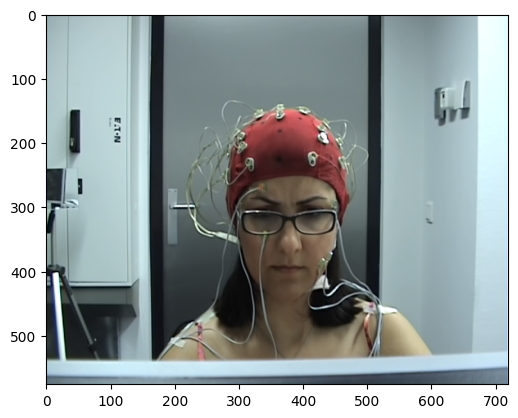

In [9]:
participant_ids = list(range(1, 23))
data_save_folder = '/content/drive/MyDrive/11777-Project-xs/data_face_seg_mean'
data_save_folder2 = '/content/drive/MyDrive/11777-Project-xs/data_face'

for participant_id in auto.tqdm(participant_ids):
    participant_id = '{:02d}'.format(participant_id)
    for trial_id in auto.tqdm(range(1, 41)):
        file_name = 's{0}_trial{1}_mean_frames.npy'.format(participant_id, trial_id)
        if not os.path.exists(os.path.join(data_save_folder, file_name)):
            print('No face data found for s{0}_trial{1}'.format(participant_id, trial_id))
            continue

        file_name2 = 's{0}_trial{1}_mean_frames_embed.npy'.format(participant_id, trial_id)
        participant_trial_seg = np.load(os.path.join(data_save_folder, file_name))
        plt.imshow(participant_trial_seg[8], cmap=plt.cm.Spectral)
        plt.imsave(os.path.join(data_save_folder2,
                                'curr_face_image_sub{}_trial{}.png'.format(participant_id, trial_id)), np.uint8(participant_trial_seg[0]),
                     cmap=plt.cm.Spectral)

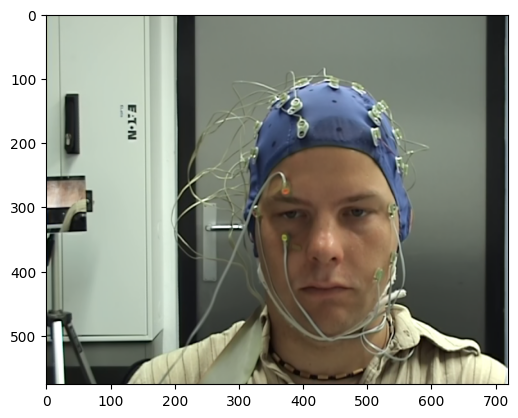

In [7]:
plt.imshow(participant_trial_seg[8], cmap=plt.cm.Spectral)
          #  plt.imsave('curr_face_image.png', np.uint8(participant_trial_seg[0]),
          #              cmap=plt.cm.Spectral)

In [ ]:
participant_ids = list(range(1, 23))
data_save_folder = '/content/drive/MyDrive/11777-Project-xs/data_face_seg_mean'

def delete_file(path):
    '''
    used to remove temporal file generated
    '''
    if os.path.exists(path):
        os.remove(path)

for participant_id in auto.tqdm(participant_ids):
    participant_id = '{:02d}'.format(participant_id)
    for trial_id in auto.tqdm(range(1, 41)):
        file_name = 's{0}_trial{1}_mean_frames.npy'.format(participant_id, trial_id)
        if not os.path.exists(os.path.join(data_save_folder, file_name)):
            print('No face data found for s{0}_trial{1}'.format(participant_id, trial_id))
            continue

        file_name2 = 's{0}_trial{1}_mean_frames_embed.npy'.format(participant_id, trial_id)
        if os.path.exists(os.path.join(data_save_folder, file_name2)):
            continue
        participant_trial_seg = np.load(os.path.join(data_save_folder, file_name))
        participant_trial_embed = []
        for image in participant_trial_seg:
            delete_file('curr_face_image.png')
            plt.imsave('curr_face_image.png', np.uint8(participant_trial_seg[0]),
                       cmap=plt.cm.Spectral)
            embedding_objs = DeepFace.represent(img_path = 'curr_face_image.png', enforce_detection = False)
            embedding = embedding_objs[0]['embedding']
            assert isinstance(embedding, list)
            assert len(embedding) == 2622
            participant_trial_embed.append(np.array(embedding))

        participant_trial_embed = np.stack(participant_trial_embed, axis=0)
        np.save(os.path.join(data_save_folder, file_name2), participant_trial_embed)


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

No face data found for s03_trial40


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

No face data found for s05_trial40


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

No face data found for s11_trial38
No face data found for s11_trial39
No face data found for s11_trial40


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

No face data found for s14_trial40


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

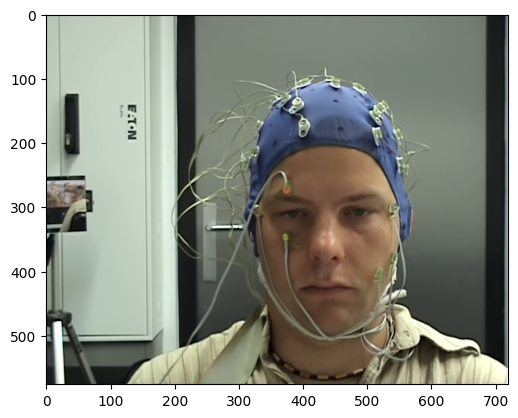

In [ ]:
plt.imshow(np.uint8(participant_trial_seg[0]), cmap = plt.cm.Spectral)
plt.imsave('test.png', np.uint8(participant_trial_seg[0]), cmap=plt.cm.Spectral)

In [ ]:
DeepFace.represent('test.png')

In [ ]:
# embeddings
embedding_objs = DeepFace.represent(img_path = "test.png")

In [ ]:
embedding = embedding_objs[0]['embedding']

In [ ]:
# Directory path where you want to remove files
directory = data_save_folder

# Characters to search for in filenames
characters_to_remove = '('

# Get a list of all files in the directory
file_list = os.listdir(directory)

# Iterate through the files and remove those with the specified characters
for filename in file_list:
    if any(char in filename for char in characters_to_remove):
        print(filename)
        file_path = os.path.join(directory, filename)
        os.remove(file_path)
        print(f"Removed file: {filename}")